## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Loading the dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
df_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
from sklearn.utils import shuffle
df_fake = shuffle(df_fake)
df_fake = df_fake.reset_index(drop=True)

df_true = shuffle(df_true)
df_true = df_true.reset_index(drop=True)

In [ ]:
df_true.shape,df_fake.shape

((21417, 5), (23481, 5))

In [ ]:
# Removing last 300 rows for training
df_fake_partial = df_fake.tail(300)
for i in range(23480,23180,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_partial = df_true.tail(300)
for i in range(21416,21316,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_merge = pd.concat([df_fake_partial,df_true_partial], axis = 0)
df_merge.head(10)

,title,text,subject,date,class
23181,BUSTED! DNC CHAIR TOM PEREZ Flip Flops On Know...,After he previously denied knowing about the d...,politics,"Nov 10, 2017",0
23182,WATCH: Fox News Incites Anger And Controversy...,Fox News has declared war on the Merriam-Webst...,News,"May 29, 2016",0
23183,SORE LOSER MICHAEL MOORE Calls On “Comrades” T...,Disrupt the Inauguration. The Majority have s...,left-news,"Dec 7, 2016",0
23184,THE FUTURE BELONGS To AI And Whoever Masters I...,While all eyes are on North Korea and Melania ...,left-news,"Sep 4, 2017",0
23185,HILARIOUS! Everyone’s Laughing When They See W...,Could there be two creepier people than creep...,politics,"Oct 26, 2017",0
23186,DEM STRATEGIST Says Torture OF White Special N...,"CNN host Don Lemon asks guest Simone Sanders,...",left-news,"Jan 5, 2017",0
23187,AUTHOR OF CHILDREN’S BOOKS Gets DESTROYED On S...,"Children s author and father of two, Ken Jenni...",politics,"May 31, 2017",0
23188,Watch Chris Christie Awkwardly Dance At Sprin...,New Jersey Governor Chris Christie loves Bruce...,News,"April 26, 2016",0
23189,When The View’s WHOOPI GOLDBERG Told Hillary W...,The sympathetic (and borderline communist) wom...,left-news,"Sep 14, 2017",0
23190,THE VIEW Brings On Bill O’Reilly’s Sexual Hara...,The last accuser who could have been the nail ...,left-news,"Apr 20, 2017",0


## Data Preprocessing

1. Remove unwanted features
2. Lower case the text field
3. Remove punctuations
4. Remove stopwords
5. Lemmatization
6. N-Gram modelling

In [ ]:
#Removing unwanted columns
df = df_merge.drop(["title","date"], axis = 1)

In [ ]:
df.isnull().sum()

text       0
subject    0
class      0
dtype: int64

In [ ]:
df.head()

,text,subject,class
23181,After he previously denied knowing about the d...,politics,0
23182,Fox News has declared war on the Merriam-Webst...,News,0
23183,Disrupt the Inauguration. The Majority have s...,left-news,0
23184,While all eyes are on North Korea and Melania ...,left-news,0
23185,Could there be two creepier people than creep...,politics,0


In [ ]:
df.columns

Index(['text', 'subject', 'class'], dtype='object')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def wordopt(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum() and word not in stopwords.words('english') ]
    text = ' '.join(text) 
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,subject,class
23181,previously denied knowing dirty trump dossier ...,politics,0
23182,fox news declared war merriam webster dictiona...,News,0
23183,disrupt inauguration majority spoken nearly mi...,left-news,0
23184,eyes north korea melania stilettos rt competit...,left-news,0
23185,could two creepier people creepy joe biden sex...,politics,0


subject
Government News     18
Middle-east         12
News                99
US_News              9
left-news           83
politics            79
politicsNews       161
worldnews          139
Name: text, dtype: int64


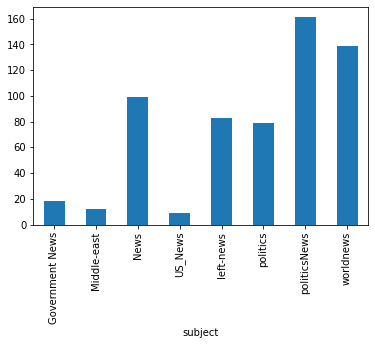

In [ ]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Word Clouds display the most prominent or frequent words in a body of text.

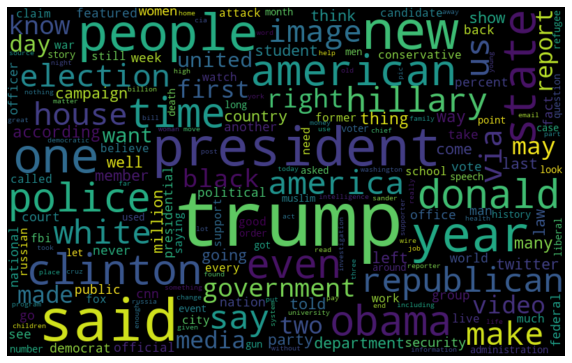

In [ ]:
#For FAKE DATA
from wordcloud import WordCloud
fake_data = df[df["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

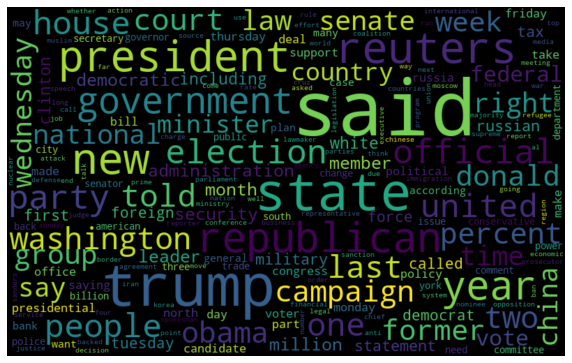

In [ ]:
#For REAL Dataset
from wordcloud import WordCloud
real_data = df[df["class"] == 1]
all_words = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Showing the most frequent words by counting their occurences
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

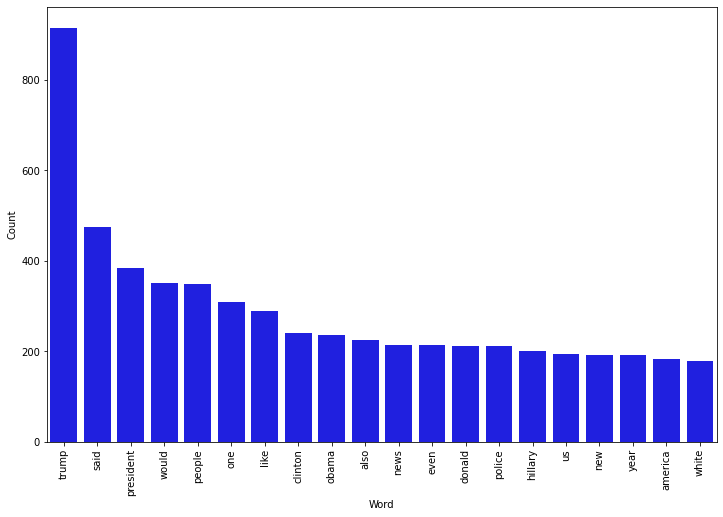

In [ ]:
counter(df[df["class"] == 0], "text", 20)  # Fake News

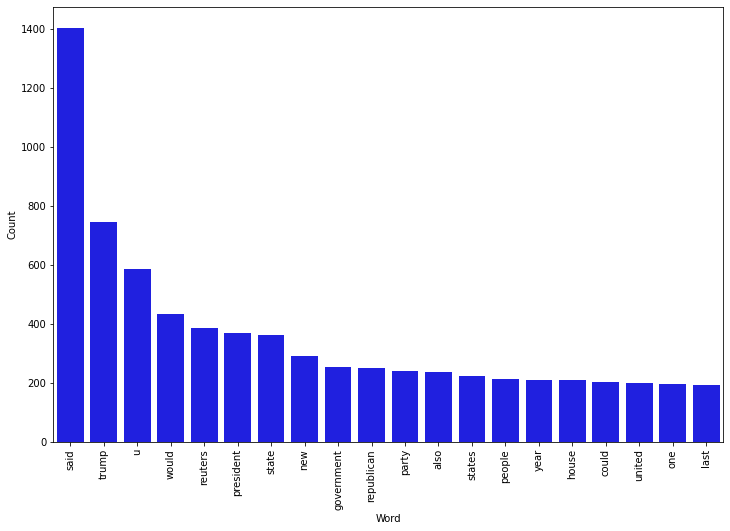

In [ ]:
counter(df[df["class"] == 1], "text", 20)   # True News

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Basic cleaning - lemmatization
import nltk
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

## N_GRAM MODELLING

1. True News Bigram and Trigram
2. Fake News Bigram and Trigram
3. Whole dataset Bigram and Trigram

In [ ]:
#True News
# Cleaning the set
true_word = basic_clean(''.join(str(real_data['text'].tolist())))

In [ ]:
#Listing various Bigrams and arranging them in descending order, 1st being the most frequent bigram 
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

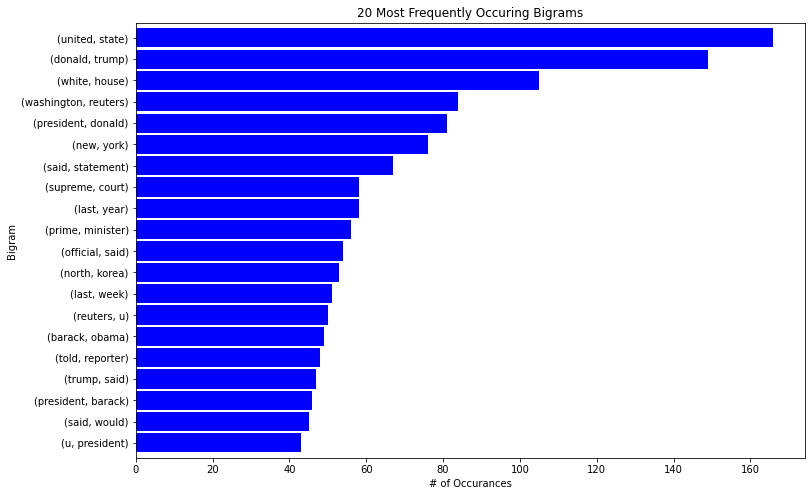

In [ ]:
#Plotting first 20
true_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

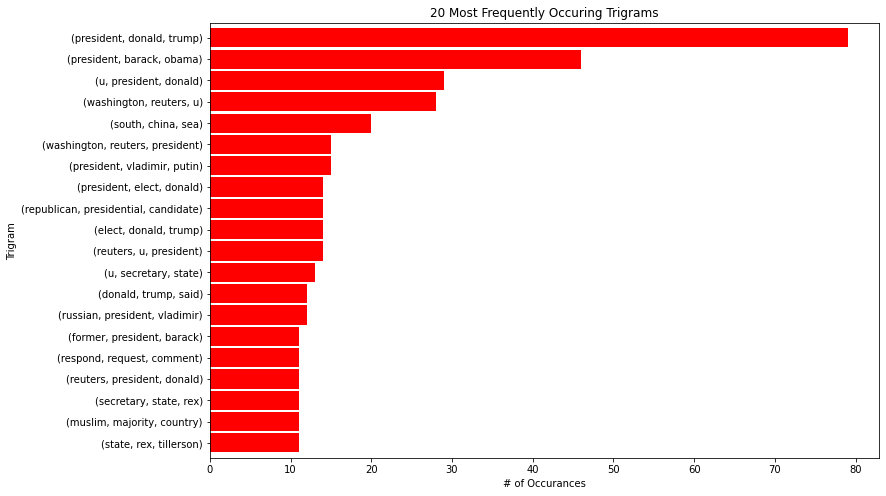

In [ ]:
# True News ; TRIGRAM Model
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
#FAKE NEWS - Cleaning
false_word = basic_clean(''.join(str(fake_data['text'].tolist())))

Text(0.5, 0, '# of Occurances')

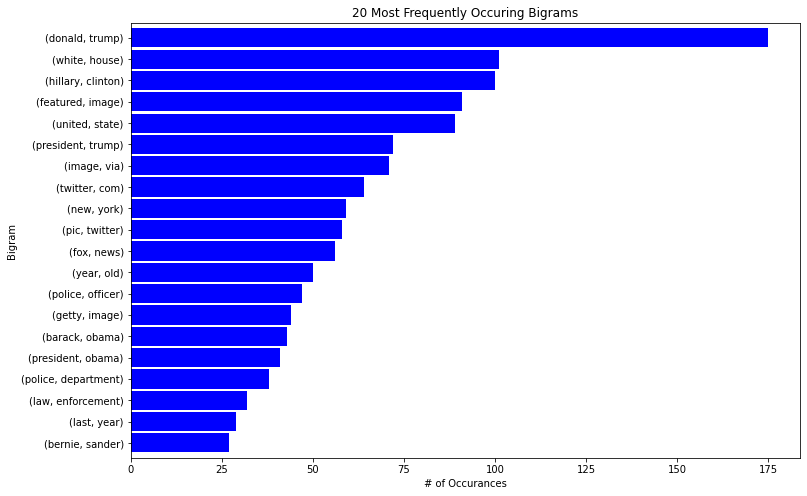

In [ ]:
# FAKE NEWS; BIGRAM SERIES
false_bigrams_series = (pd.Series(nltk.ngrams(false_word, 2)).value_counts())[:20]
false_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

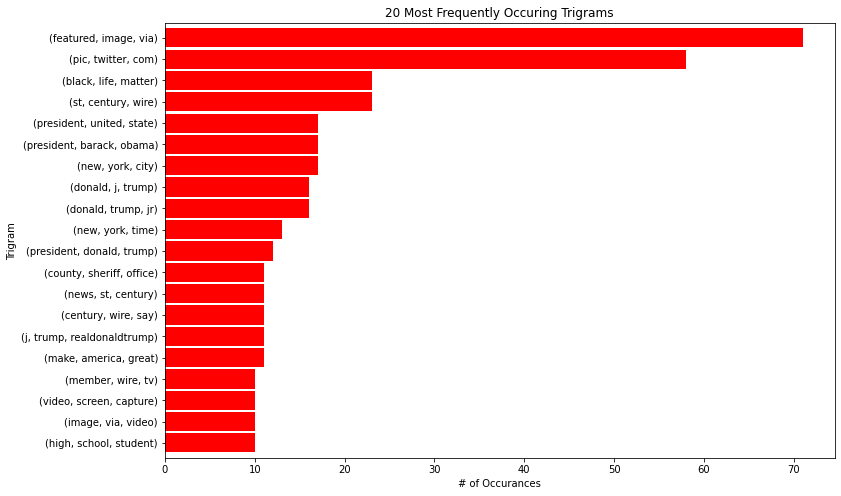

In [ ]:
# FAKE NEWS; TRIGRAM SERIES
false_trigrams_series = (pd.Series(nltk.ngrams(false_word, 3)).value_counts())[:20]
false_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
#ENTIRE DATASET
words = basic_clean(''.join(str(df['text'].tolist())))

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20] #BIGRAM

Text(0.5, 0, '# of Occurances')

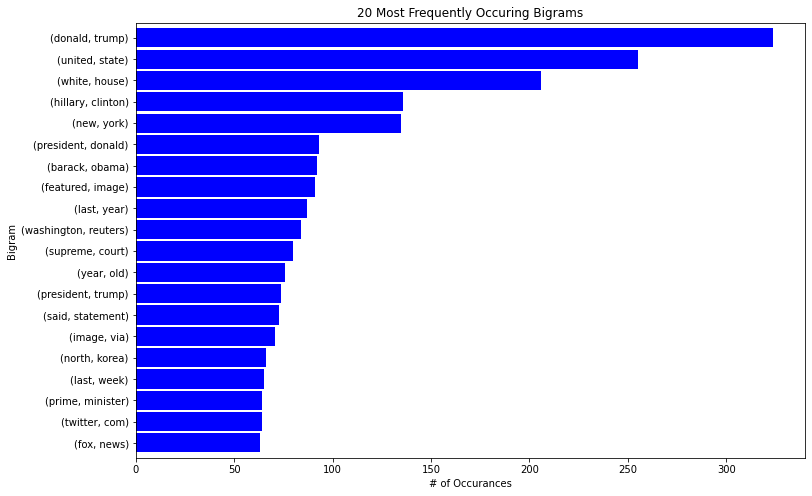

In [ ]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]  # TRIGRAM

Text(0.5, 0, '# of Occurances')

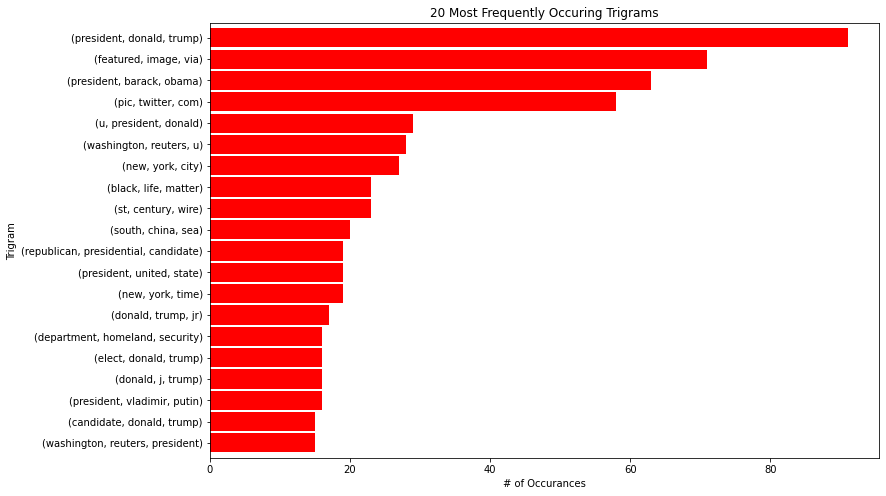

In [ ]:
trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
# Building Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.17%
